KODUN İÇERİĞİ : BERT Modelinin Ekmann Verisi ile fine-tune edilmesi

In [ ]:
!pip3 install ktrain

In [ ]:
import ktrain
from ktrain import text

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 27.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ekman_dataset/train_ekmann.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ekman_dataset/test_ekmann.csv")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43410 entries, 0 to 43409
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     43410 non-null  object
 1   Emotion  43410 non-null  object
 2   Id       43410 non-null  object
dtypes: object(3)
memory usage: 1017.5+ KB


In [ ]:
l = ["Id"]

In [ ]:
train_df.drop(l, axis =1, inplace= True)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_df['Text'], train_df['Emotion'], shuffle=True, test_size = 0.2, random_state=42, stratify=train_df['Emotion'])

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

In [ ]:
train_names = ['joy','neutral','surprise','anger', 'sadness', 'disgust','fear']

In [ ]:
train_names[0]

'joy'

In [ ]:
(x_train_bert, y_train_bert), (x_val_bert, y_val_bert), preproc = text.texts_from_array(x_train = x_train, y_train=y_train,
x_test = x_val, y_test=y_val, class_names = train_names,preprocess_mode= 'bert',
lang = 'en', maxlen=128,
max_features=35000)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


task: text classification


In [ ]:
model = text.text_classifier('bert', train_data=(x_train_bert, y_train_bert), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train_bert, y_train_bert), val_data=(x_val_bert, y_val_bert), batch_size=32)


Is Multi-Label? False
maxlen is 128


/usr/local/lib/python3.10/dist-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/5
1086/1086 [==============================] - 366s 285ms/step - loss: 1.5403 - accuracy: 0.4288
Epoch 2/5
1086/1086 [==============================] - 309s 284ms/step - loss: 0.9729 - accuracy: 0.6412
Epoch 3/5
1086/1086 [==============================] - 310s 285ms/step - loss: 1.4597 - accuracy: 0.4397
Epoch 4/5
1086/1086 [==============================] - 161s 148ms/step - loss: 6.3591 - accuracy: 0.3336


done.
Visually inspect loss plot and select learning rate associated with falling loss


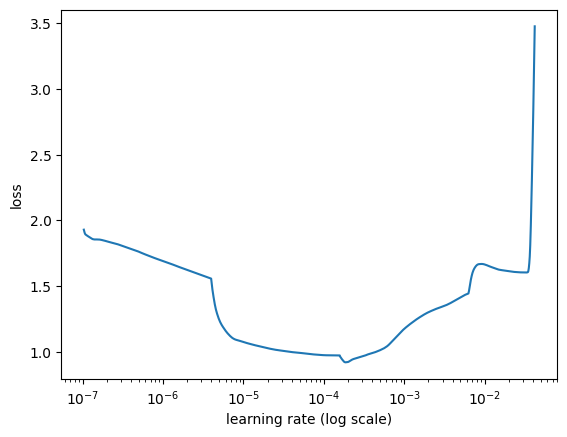

In [ ]:
learner.lr_find(show_plot=True, max_epochs=5)

In [ ]:
learner.fit_onecycle(1e-4, 5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
1086/1086 [==============================] - 398s 331ms/step - loss: 0.9845 - accuracy: 0.6330 - val_loss: 0.8856 - val_accuracy: 0.6639
Epoch 2/5
1086/1086 [==============================] - 351s 323ms/step - loss: 0.7993 - accuracy: 0.6997 - val_loss: 0.9789 - val_accuracy: 0.6328
Epoch 3/5
1086/1086 [==============================] - 350s 323ms/step - loss: 0.6564 - accuracy: 0.7586 - val_loss: 0.9210 - val_accuracy: 0.6622
Epoch 4/5
1086/1086 [==============================] - 350s 323ms/step - loss: 0.3364 - accuracy: 0.8799 - val_loss: 1.3225 - val_accuracy: 0.6396
Epoch 5/5
1086/1086 [==============================] - 350s 323ms/step - loss: 0.0723 - accuracy: 0.9763 - val_loss: 1.7810 - val_accuracy: 0.6550


In [ ]:
model_path = 'emotion_detection_model'
learner.save_model(model_path)

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
